In [ ]:
print("Hello")

In [1]:
import mysql.connector
import pandas as pd

class DBManager :
    
    def __init__(self, host, port, user, password, database):
        self.host = host
        self.port = port
        self.user = user
        self.password = password
        self.database = database
        self.db = mysql.connector.connect(
            host=host,
            port=port,
            user=user,
            password=password,
            database=database
        )
        self.cursor = self.db.cursor(buffered=True)
        print("DB connected")

    def close(self):
        if self.cursor:
            self.cursor.close()
        if self.db:
            self.db.close()
        print("DB disconnected")

    def select_all(self, table):
        sql = f"SELECT * FROM {table}"
        self.cursor.execute(sql)
        result = self.cursor.fetchall()
        columns = [col[0] for col in self.cursor.description]
        df = pd.DataFrame(result, columns=columns).reset_index(drop=True)
        return df

    def execute(self, sql):
        self.cursor.execute(sql)
        self.db.commit()
        print("------------------------------------------")
        print("EXECUTED")
        if self.cursor.description is not None:
            result = self.cursor.fetchall()
            print(result)
        return True
    
dbm = DBManager(
    host="jinhyuk2db.c94oygiiukcg.ap-northeast-2.rds.amazonaws.com",
    port= 3306,
    user="root",
    password="jinhyuk2dacibul",
    database="project1"
)

DB connected


In [2]:
df = dbm.select_all("rental_birth_year_summary")
df

,birth_year,rental_count
0,1945,8158
1,1946,9001
2,1947,9487
3,1948,15011
4,1949,12480
...,...,...
60,2005,559916
61,2006,636532
62,2007,693450
63,2008,424653


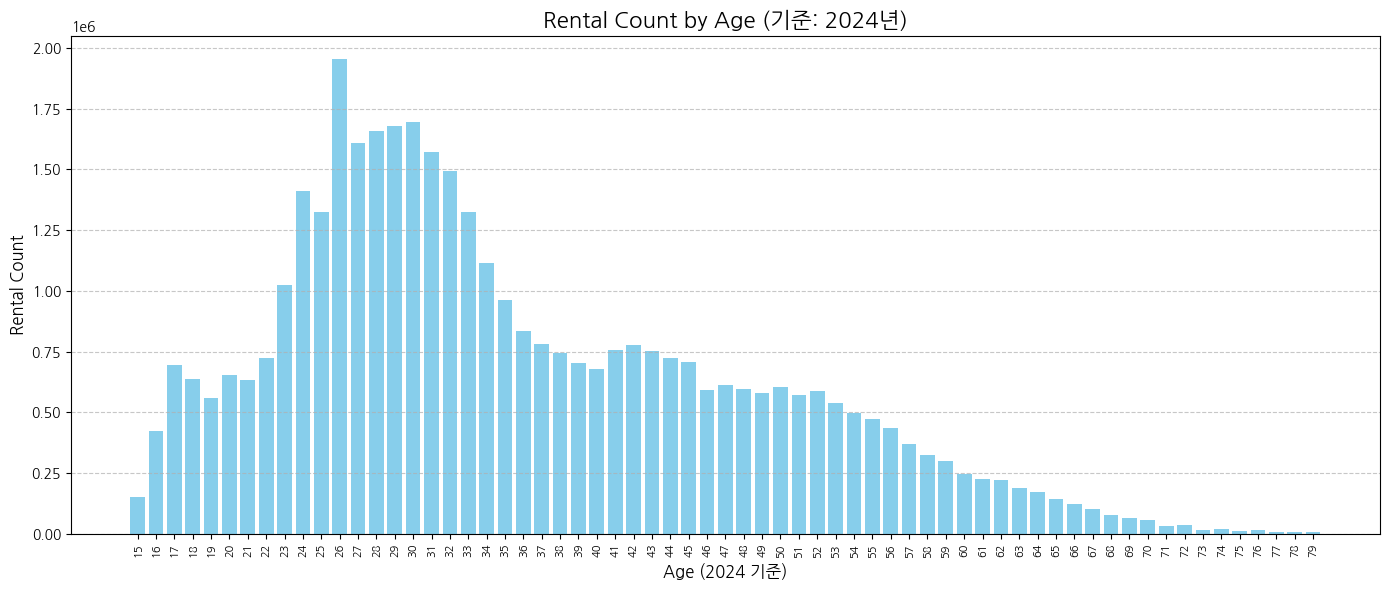

In [6]:
import matplotlib.pyplot as plt

# 2024년 기준 나이 계산
df['age'] = 2024 - df['birth_year']

# 나이 기준으로 오름차순 정렬
df_sorted = df.sort_values(by='age')

# 막대그래프 그리기
plt.figure(figsize=(14, 6))
plt.bar(df_sorted['age'], df_sorted['rental_count'], color='skyblue')

# x축에 나이 값 표시
plt.xticks(df_sorted['age'], labels=df_sorted['age'], rotation=90, fontsize=8)

plt.xlabel('Age (2024 기준)', fontsize=12)
plt.ylabel('Rental Count', fontsize=12)
plt.title('Rental Count by Age (기준: 2024년)', fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

